In [1]:
import sys
sys.path.append('../vocaldetection/')

import separated_features_training as sf

import librosa.display
import librosa
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.signal import medfilt

In [147]:
import medleydb as mdb

# Store all multitracks
all_mtracks = {}

# Load all multitracks
mtrack_generator = mdb.load_all_multitracks()
for mtrack in mtrack_generator:
    all_mtracks[mtrack.track_id] = mtrack

/home/shayenne/.local/lib/python3.7/site-packages/medleydb/__init__.py:40: UserWarning: The value set for MEDLEYDB_PATH: /media/shayenne/CompMusHD/DATASETS/MedleyDB/ does not exist. As a result, any part of the code that requires the audio won't work. If you don't need to access the audio, disregard this warning. If you do, set the environment variable MEDLEYDB_PATH to your local copy of MedleyDB.
  UserWarning
/home/shayenne/.local/lib/python3.7/site-packages/medleydb/__init__.py:64: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  INST_TAXONOMY = yaml.load(fhandle)
/home/shayenne/.local/lib/python3.7/site-packages/medleydb/__init__.py:72: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  MIXING_COEFFICIENTS = yaml.load(fhandle)
/home/shayenne/.local/lib/pytho

In [3]:
path = '/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/'

In [4]:
#path_pieces = '../vocaldetection/vocal_pieces.json'
SPLITS = 'split_train_test_10.json'

In [5]:
train_files = []
test_files = []
with open(SPLITS) as json_file:  
    data = json.load(json_file)
#print (data)
    for spl in range(len(data)):
        train_files.append([])
        test_files.append([])
        # Load train data
        for music in data[spl]['train']:
            train_files[spl].append(music)
        #    print (music)

        # Load test data
        #print ('Test data')
        for music in data[spl]['test']:
            test_files[spl].append(music)

AClassicEducation_NightOwl
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AClassicEducation_NightOwl_MIX/vocals.wav
22050


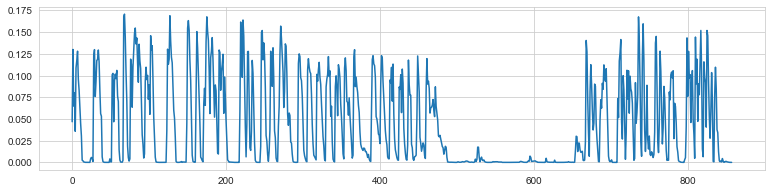

AimeeNorwich_Child
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AimeeNorwich_Child_MIX/vocals.wav
22050


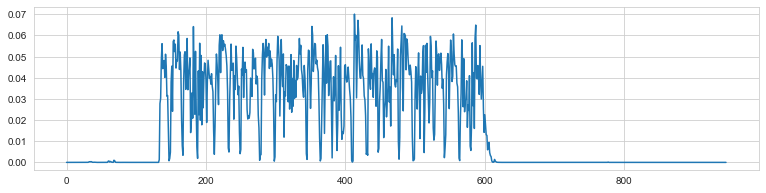

AlexanderRoss_GoodbyeBolero
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AlexanderRoss_GoodbyeBolero_MIX/vocals.wav
22050


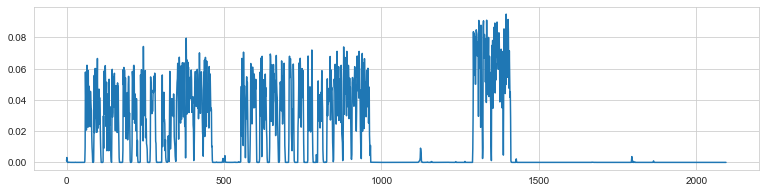

AlexanderRoss_VelvetCurtain
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AlexanderRoss_VelvetCurtain_MIX/vocals.wav
22050


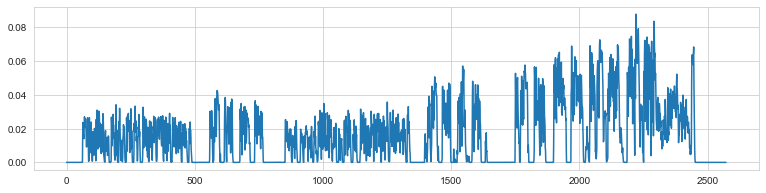

Auctioneer_OurFutureFaces
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Auctioneer_OurFutureFaces_MIX/vocals.wav
22050


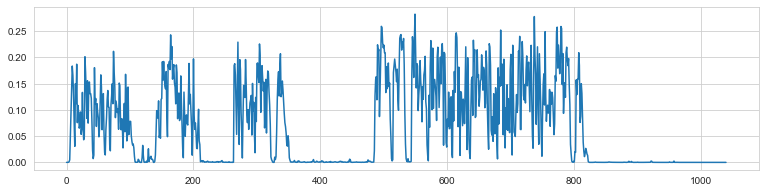

BigTroubles_Phantom
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/BigTroubles_Phantom_MIX/vocals.wav
22050


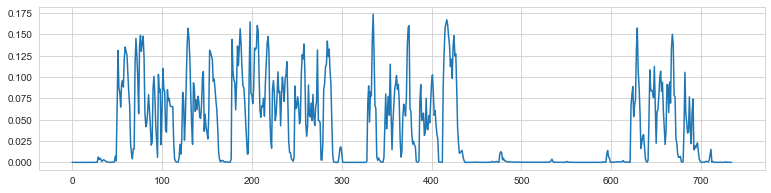

BrandonWebster_DontHearAThing
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/BrandonWebster_DontHearAThing_MIX/vocals.wav
22050


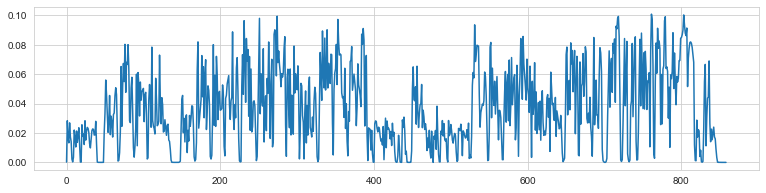

BrandonWebster_YesSirICanFly
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/BrandonWebster_YesSirICanFly_MIX/vocals.wav
22050


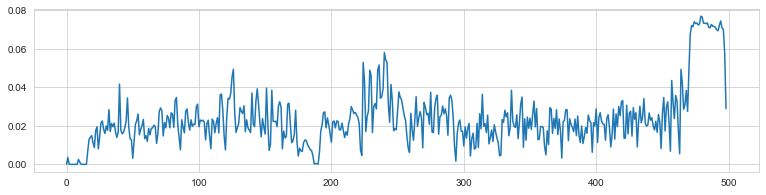

ClaraBerryAndWooldog_AirTraffic
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/ClaraBerryAndWooldog_AirTraffic_MIX/vocals.wav
22050


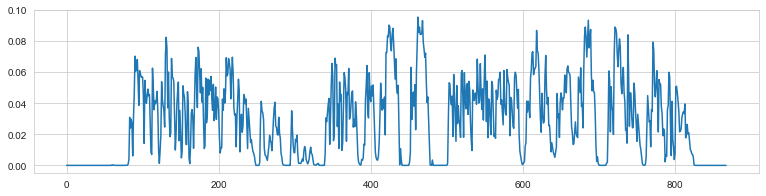

ClaraBerryAndWooldog_Boys
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/ClaraBerryAndWooldog_Boys_MIX/vocals.wav
22050


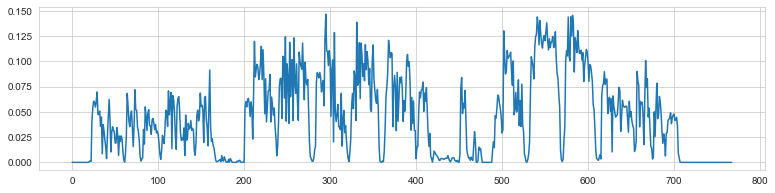

ClaraBerryAndWooldog_Stella
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/ClaraBerryAndWooldog_Stella_MIX/vocals.wav
22050


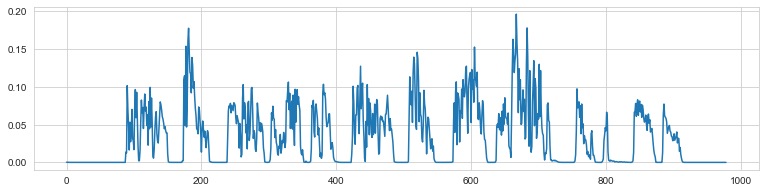

ClaraBerryAndWooldog_TheBadGuys
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/ClaraBerryAndWooldog_TheBadGuys_MIX/vocals.wav
22050


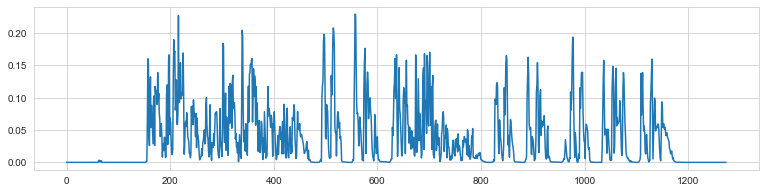

ClaraBerryAndWooldog_WaltzForMyVictims
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/ClaraBerryAndWooldog_WaltzForMyVictims_MIX/vocals.wav
22050


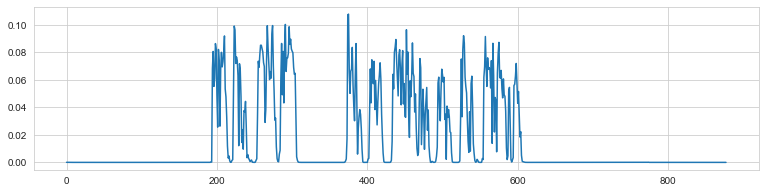

Debussy_LenfantProdigue
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Debussy_LenfantProdigue_MIX/vocals.wav
22050


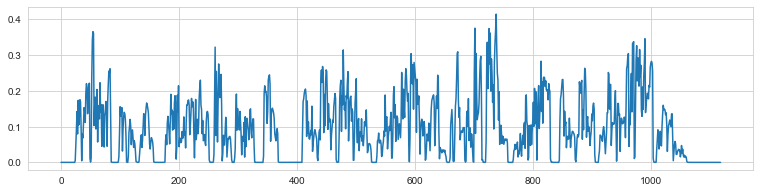

DreamersOfTheGhetto_HeavyLove
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/DreamersOfTheGhetto_HeavyLove_MIX/vocals.wav
22050


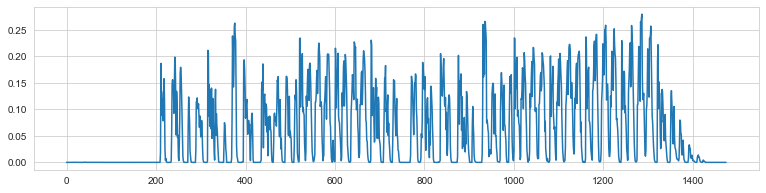

FacesOnFilm_WaitingForGa
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/FacesOnFilm_WaitingForGa_MIX/vocals.wav
22050


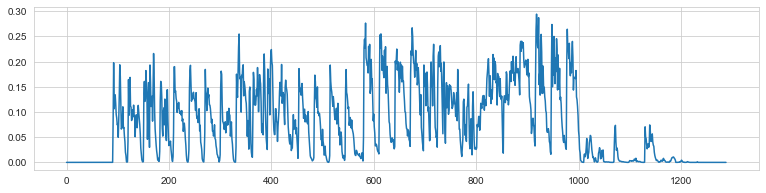

FamilyBand_Again
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/FamilyBand_Again_MIX/vocals.wav
22050


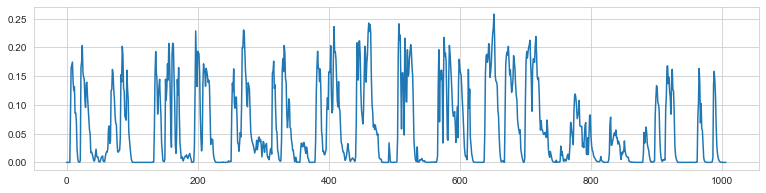

HeladoNegro_MitadDelMundo
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/HeladoNegro_MitadDelMundo_MIX/vocals.wav
22050


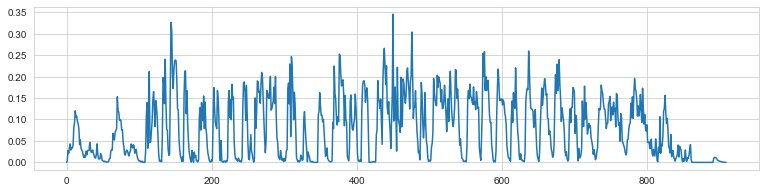

HezekiahJones_BorrowedHeart
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/HezekiahJones_BorrowedHeart_MIX/vocals.wav
22050


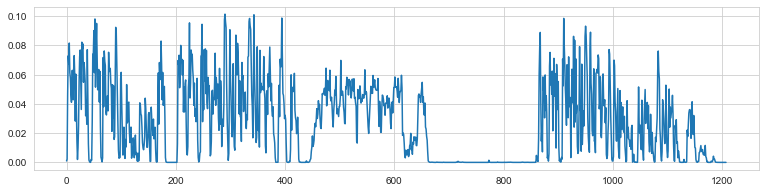

InvisibleFamiliars_DisturbingWildlife
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/InvisibleFamiliars_DisturbingWildlife_MIX/vocals.wav
22050


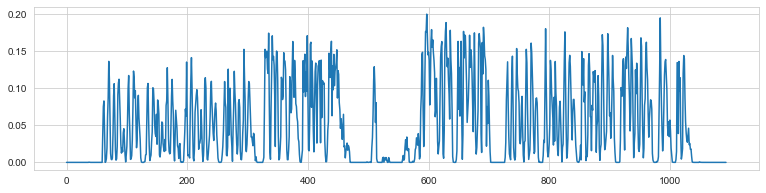

LizNelson_Coldwar
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/LizNelson_Coldwar_MIX/vocals.wav
22050


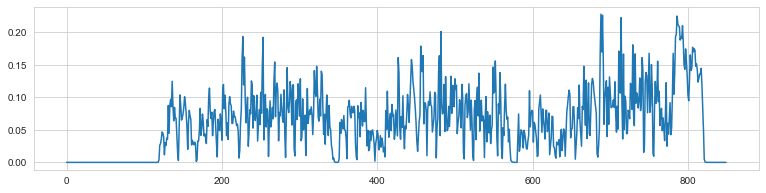

LizNelson_ImComingHome
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/LizNelson_ImComingHome_MIX/vocals.wav
22050


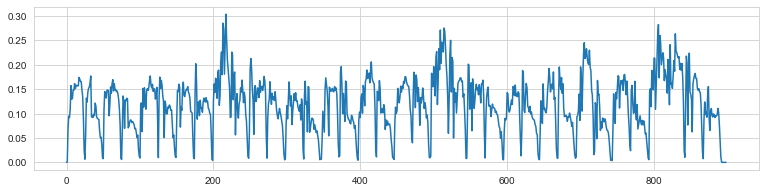

LizNelson_Rainfall
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/LizNelson_Rainfall_MIX/vocals.wav
22050


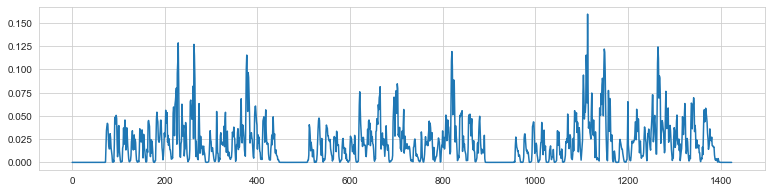

MatthewEntwistle_DontYouEver
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MatthewEntwistle_DontYouEver_MIX/vocals.wav
22050


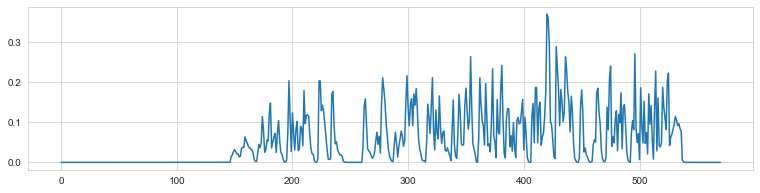

MatthewEntwistle_Lontano
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MatthewEntwistle_Lontano_MIX/vocals.wav
22050


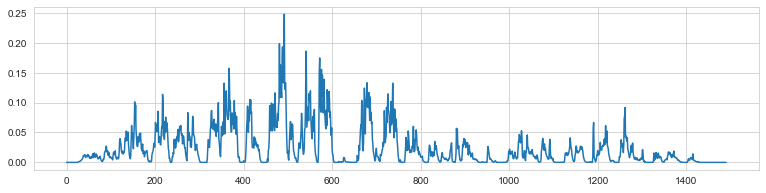

Meaxic_TakeAStep
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Meaxic_TakeAStep_MIX/vocals.wav
22050


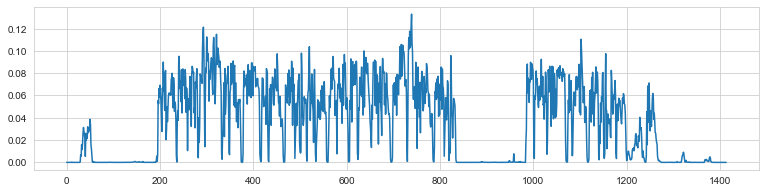

Meaxic_YouListen
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Meaxic_YouListen_MIX/vocals.wav
22050


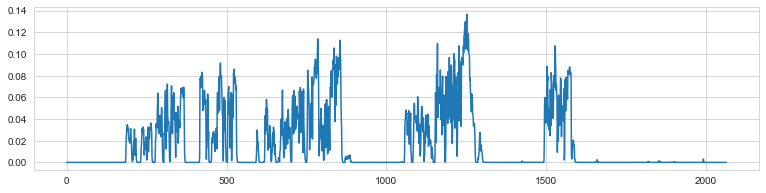

Mozart_DiesBildnis
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Mozart_DiesBildnis_MIX/vocals.wav
22050


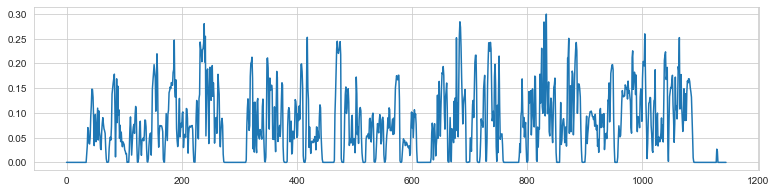

MusicDelta_80sRock
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_80sRock_MIX/vocals.wav
22050


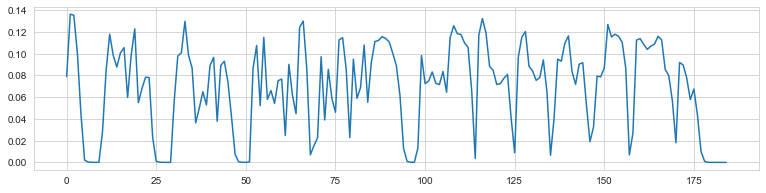

MusicDelta_Beatles
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Beatles_MIX/vocals.wav
22050


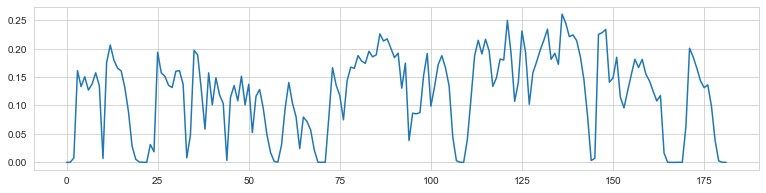

MusicDelta_Country1
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Country1_MIX/vocals.wav
22050


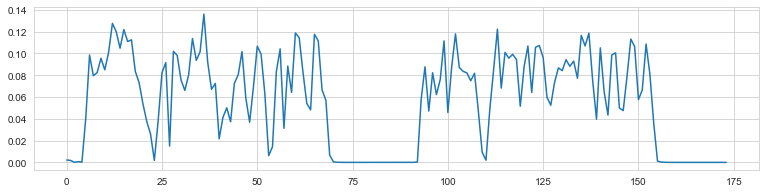

MusicDelta_Gospel
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Gospel_MIX/vocals.wav
22050


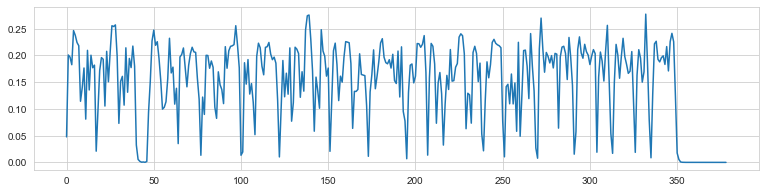

MusicDelta_Punk
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Punk_MIX/vocals.wav
22050


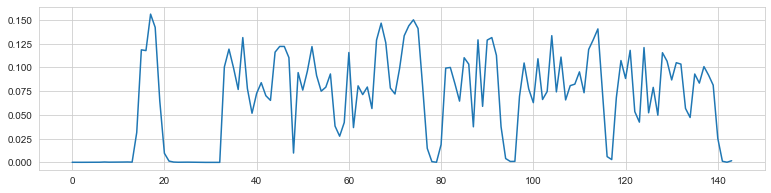

MusicDelta_Reggae
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Reggae_MIX/vocals.wav
22050


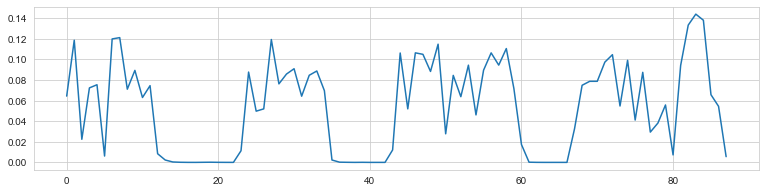

MusicDelta_Rockabilly
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Rockabilly_MIX/vocals.wav
22050


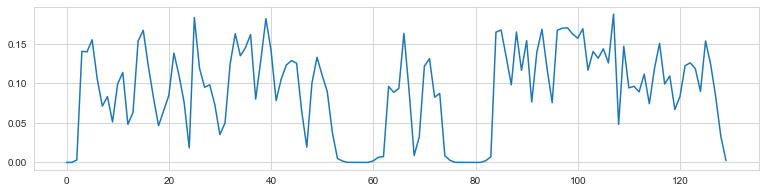

NightPanther_Fire
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/NightPanther_Fire_MIX/vocals.wav
22050


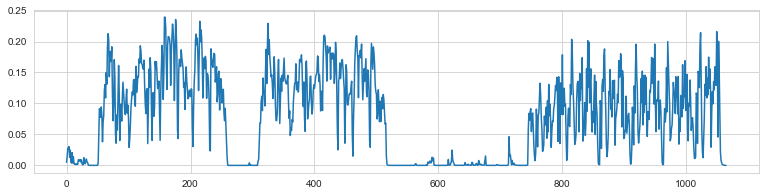

PortStWillow_StayEven
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/PortStWillow_StayEven_MIX/vocals.wav
22050


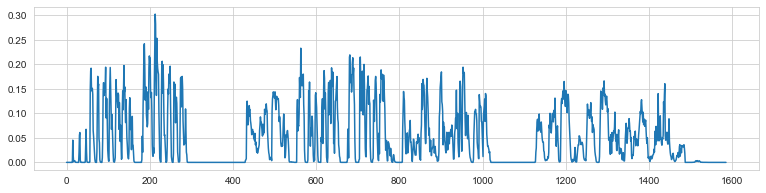

Schubert_Erstarrung
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Schubert_Erstarrung_MIX/vocals.wav
22050


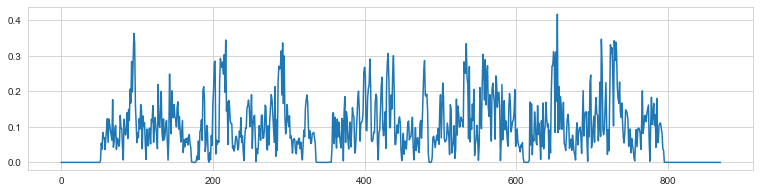

Snowmine_Curfews
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Snowmine_Curfews_MIX/vocals.wav
22050


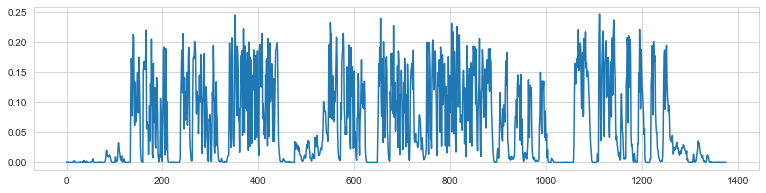

StevenClark_Bounty
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/StevenClark_Bounty_MIX/vocals.wav
22050


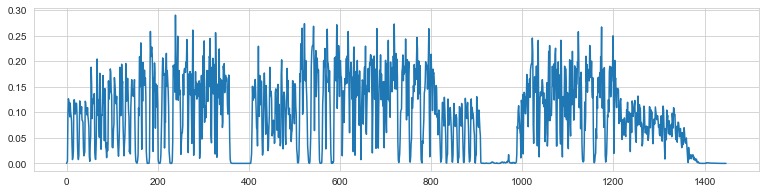

SweetLights_YouLetMeDown
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/SweetLights_YouLetMeDown_MIX/vocals.wav
22050


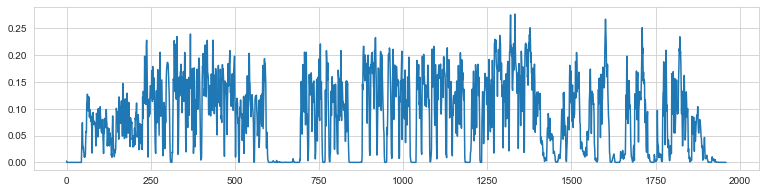

TheScarletBrand_LesFleursDuMal
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/TheScarletBrand_LesFleursDuMal_MIX/vocals.wav
22050


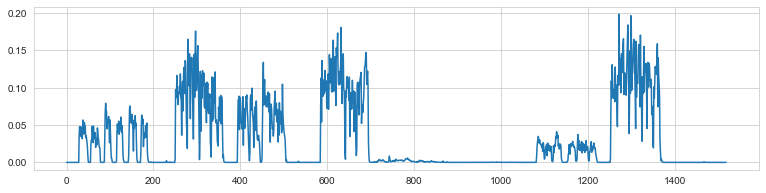

TheSoSoGlos_Emergency
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/TheSoSoGlos_Emergency_MIX/vocals.wav
22050


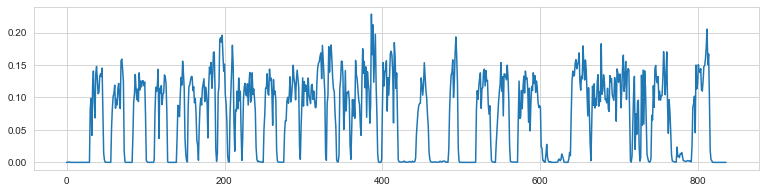

AvaLuna_Waterduct
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/AvaLuna_Waterduct_MIX/vocals.wav
22050


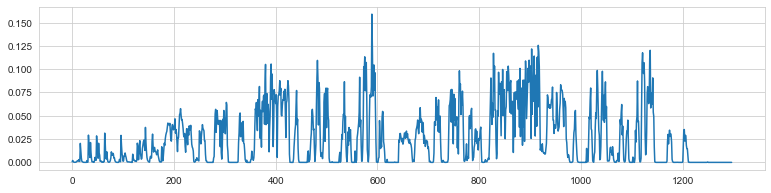

CelestialShore_DieForUs
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/CelestialShore_DieForUs_MIX/vocals.wav
22050


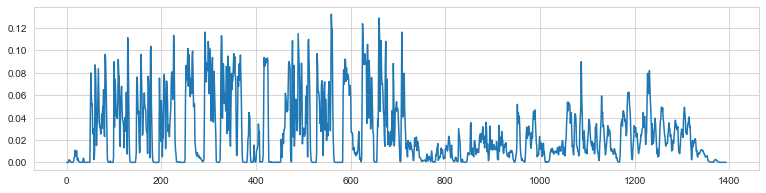

Creepoid_OldTree
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Creepoid_OldTree_MIX/vocals.wav
22050


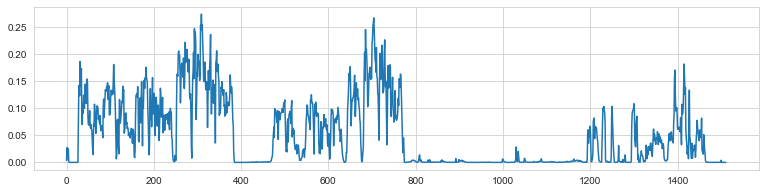

Handel_TornamiAVagheggiar
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Handel_TornamiAVagheggiar_MIX/vocals.wav
22050


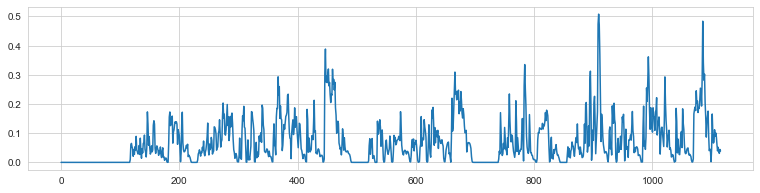

HopAlong_SisterCities
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/HopAlong_SisterCities_MIX/vocals.wav
22050


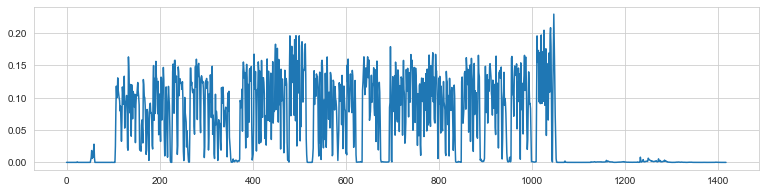

Mozart_BesterJungling
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Mozart_BesterJungling_MIX/vocals.wav
22050


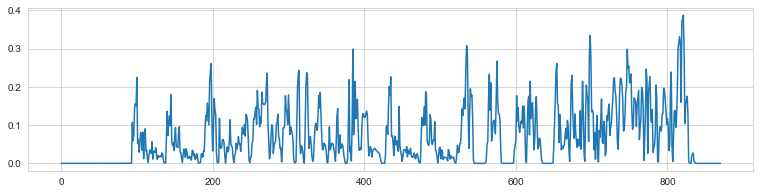

MusicDelta_Britpop
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Britpop_MIX/vocals.wav
22050


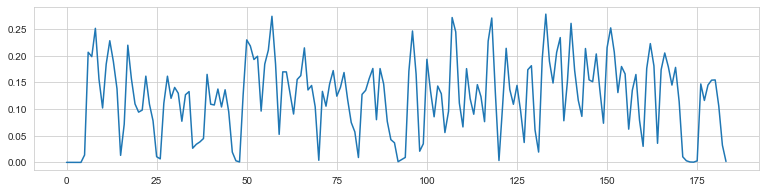

MusicDelta_Country2
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Country2_MIX/vocals.wav
22050


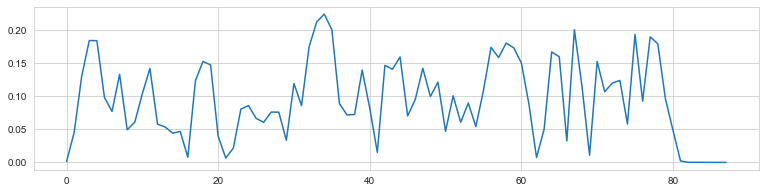

MusicDelta_Disco
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Disco_MIX/vocals.wav
22050


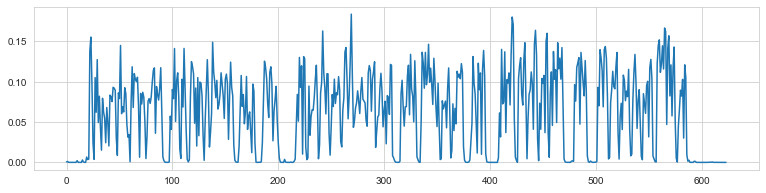

MusicDelta_Grunge
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Grunge_MIX/vocals.wav
22050


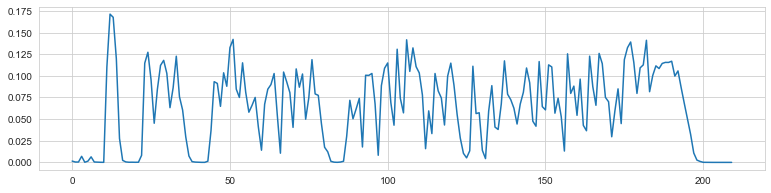

MusicDelta_Hendrix
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Hendrix_MIX/vocals.wav
22050


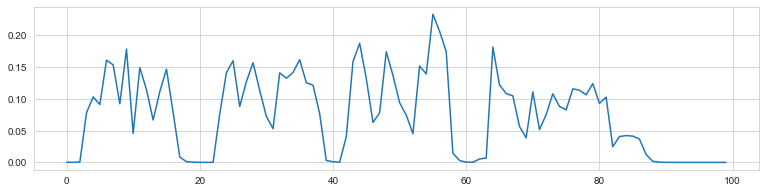

MusicDelta_Rock
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/MusicDelta_Rock_MIX/vocals.wav
22050


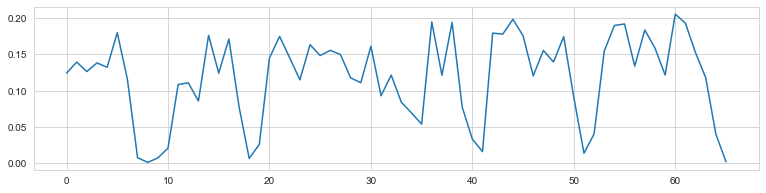

PurlingHiss_Lolita
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/PurlingHiss_Lolita_MIX/vocals.wav
22050


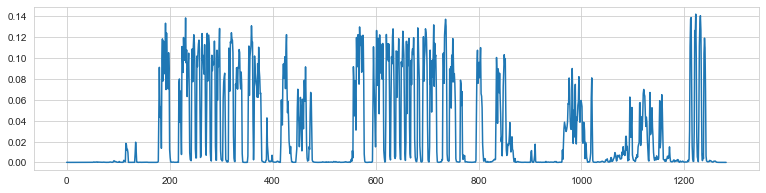

Schumann_Mignon
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Schumann_Mignon_MIX/vocals.wav
22050


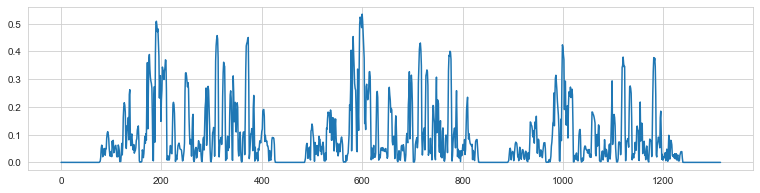

SecretMountains_HighHorse
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/SecretMountains_HighHorse_MIX/vocals.wav
22050


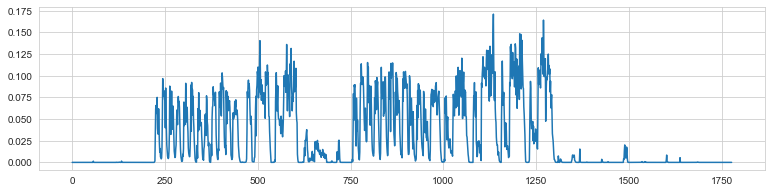

StrandOfOaks_Spacestation
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/StrandOfOaks_Spacestation_MIX/vocals.wav
22050


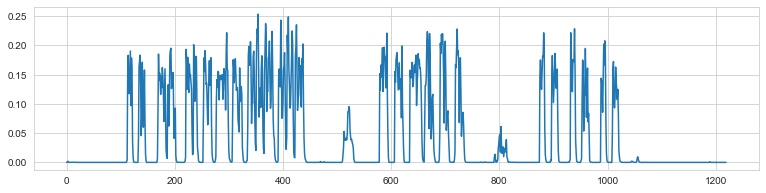

TheDistricts_Vermont
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/TheDistricts_Vermont_MIX/vocals.wav
22050


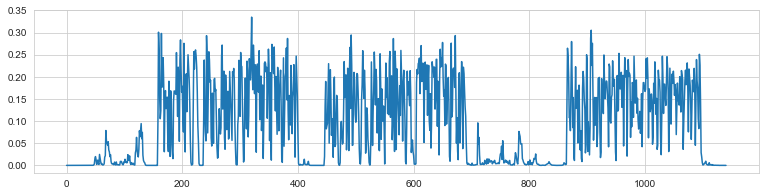

Wolf_DieBekherte
/media/DISCO2TB/datasets/MedleyDB/Audio/SeparatedSources/Wolf_DieBekherte_MIX/vocals.wav
22050


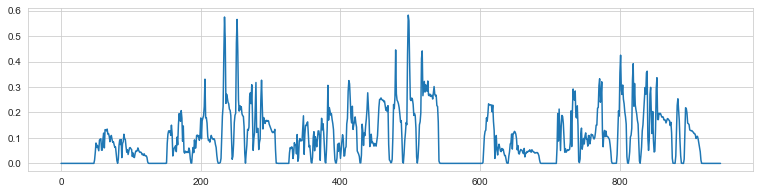

In [142]:
# Calculando apenas o primeiro split!
dict_rms = {}
for piece in train_files[0]+test_files[0]:
    print (piece)
    separated_vocals_path = path+piece+'_MIX/'+'vocals.wav'
    print (separated_vocals_path)
    y, sr = librosa.load(separated_vocals_path)
    print (sr)
    plt.figure(figsize=(13,3))
    dict_rms[piece] = librosa.feature.rms(y=y, frame_length=4410, hop_length=4410)
    plt.plot(dict_rms[piece][0])
    plt.show()
    

In [143]:
sns.set_style('white')

In [144]:
original_rms = dict_rms.copy()

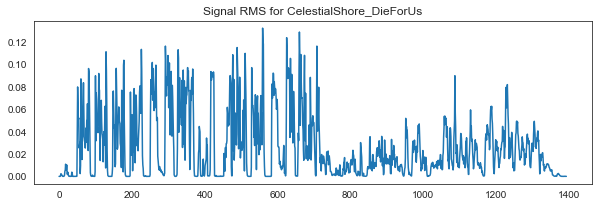

In [145]:
plt.figure(figsize=(10,3))
plt.title('Signal RMS for CelestialShore_DieForUs')
plt.plot(dict_rms['CelestialShore_DieForUs'][0])
plt.show()

In [134]:
for piece in train_files[0]+test_files[0]:
    y, sr = librosa.load(path+piece+'_MIX/vocals.wav')
    dur = librosa.get_duration(y, sr)
    print (piece)
    print (dur)

AClassicEducation_NightOwl
171.4401814058957
AimeeNorwich_Child
189.26943310657597
AlexanderRoss_GoodbyeBolero
418.8167800453515
AlexanderRoss_VelvetCurtain
514.488253968254
Auctioneer_OurFutureFaces
207.88244897959183
BigTroubles_Phantom
146.93587301587303
BrandonWebster_DontHearAThing
171.65310657596373
BrandonWebster_YesSirICanFly
99.641179138322
ClaraBerryAndWooldog_AirTraffic
173.44566893424036
ClaraBerryAndWooldog_Boys
153.47714285714287
ClaraBerryAndWooldog_Stella
195.7419954648526
ClaraBerryAndWooldog_TheBadGuys
254.68485260770976
ClaraBerryAndWooldog_WaltzForMyVictims
175.4303401360544
Debussy_LenfantProdigue
223.52689342403627
DreamersOfTheGhetto_HeavyLove
294.9863038548753
FacesOnFilm_WaitingForGa
257.632335600907
FamilyBand_Again
201.2865306122449
HeladoNegro_MitadDelMundo
181.85034013605443
HezekiahJones_BorrowedHeart
241.57845804988662
InvisibleFamiliars_DisturbingWildlife
218.69419501133788
LizNelson_Coldwar
169.9874829931973
LizNelson_ImComingHome
179.69922902494332
Liz

In [115]:
gran = 200

In [116]:
SPLITS

'split_train_test_10.json'

In [117]:
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, precision_recall_curve, auc, f1_score, accuracy_score
    
import numpy as np
from sklearn.metrics import precision_recall_fscore_support


In [118]:
def optimal_threshold(predicted,target):
    from sklearn.metrics import roc_curve
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])[0]

In [187]:
labels_path = '/media/DISCO2TB/datasets/MedleyDB/Features/'

final_tsh = []
rows_list = []


for split in tqdm(range(10)):
    
    X_train, y_train = [], []
    X_test, y_test = [], []

    dict_lbl = {}
    for piece in train_files[split]:  
        dict_lbl[piece] = np.load(labels_path+piece+'_labels_{}ms.npy'.format(gran))
        #print(len(dict_lbl[piece]), len(dict_rms[piece][0]))
        if len(dict_lbl[piece]) < len(dict_rms[piece][0]):
            complete = [0] * (len(dict_rms[piece][0])-len(dict_lbl[piece]))
            dict_lbl[piece] = dict_lbl[piece].tolist() + complete

        X_train.append(dict_rms[piece][0].copy()  / max(dict_rms[piece][0]))
        y_train.append(dict_lbl[piece].copy())


    X_train = np.concatenate(X_train)
    y_train = np.concatenate(y_train)

    print (max(X_train),np.mean(X_train),min(X_train))

    print ('train', len(X_train), len(y_train))
   
    # Find the optimal threshold
    fpr, tpr, thresholds = roc_curve(y_train, X_train)
    precision, recall, thresholds = precision_recall_curve(y_train, X_train)
    roc_auc = auc(fpr, tpr)

    # Threshold ótimo: specificity + sensibility - 1
    #tsh_optimal = max((1-fpr)+tpr-1)
    
    # Qual deles está correto????
    optimal_idx = np.argmax(abs(tpr - fpr))
    print ('sizes', len(tpr), len(fpr), len(thresholds))

    # Find optimal probability threshold
    #threshold = Find_Optimal_Cutoff(y_train, X_train)

    tsh_optimal = optimal_threshold(X_train, y_train)#thresholds[optimal_idx]
    print (tsh_optimal)
    
    final_tsh.append(tsh_optimal)
    
    
    # Evaluate test pieces
    for piece in test_files[split]:  
        dict_lbl[piece] = np.load(labels_path+piece+'_labels_{}ms.npy'.format(gran))
        if len(dict_lbl[piece]) < len(dict_rms[piece][0]):
            complete = [0] * (len(dict_rms[piece][0])-len(dict_lbl[piece]))
            dict_lbl[piece] = dict_lbl[piece].tolist() + complete

        X_test = dict_rms[piece][0].copy()  / max(dict_rms[piece][0])
        y_test = dict_lbl[piece].copy()
        piece_genre = all_mtracks[piece].genre
        
        y_true = y_test

        normalized = X_test
        normalized[normalized > tsh_optimal] = 1
        normalized[normalized <= tsh_optimal] = 0

        y_pred = normalized

        target_names = ['absent', 'present']
        #print(classification_report(y_true, y_pred, target_names=target_names))
    
        acc = accuracy_score(y_true, y_pred)
        P, R, F1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
        rows_list.append({'split':split,
                          'piece':piece,
                          'genre':piece_genre,
                          'threshold':tsh_optimal,
                          'ACC':acc,
                          'granularity':gran,
                          'P':P,'R':R,'F1':F1})

1.0 0.23606537 0.0
train 44276 44276
sizes 5832 5832 39916
0.01898285374045372
1.0 0.22562774 0.0
train 42780 42780
sizes 6061 6061 38293
0.021567311137914658
1.0 0.22903252 0.0
train 40189 40189
sizes 6200 6200 37259
0.02487090788781643
1.0 0.22550015 0.0
train 37465 37465
sizes 6756 6756 34795
0.037978459149599075
1.0 0.21603297 0.0
train 49219 49219
sizes 7343 7343 44150
0.026028504595160484
1.0 0.23728368 0.0
train 35967 35967
sizes 5942 5942 32183
0.04022681340575218
1.0 0.21820301 0.0
train 43573 43573
sizes 6904 6904 38804
0.02879633568227291
1.0 0.22493836 0.0
train 47149 47149
sizes 7822 7822 42466
0.03323648124933243
1.0 0.24198425 0.0
train 37723 37723
sizes 6008 6008 34203
0.029863707721233368
1.0 0.23476253 0.0
train 40939 40939
sizes 6621 6621 36593
0.03668726980686188



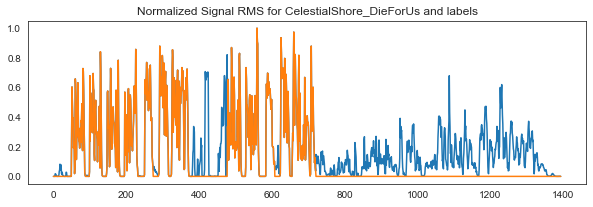

In [188]:
plt.figure(figsize=(10,3))
plt.title('Normalized Signal RMS for CelestialShore_DieForUs and labels')
plt.plot(dict_rms['CelestialShore_DieForUs'][0]/max(dict_rms['CelestialShore_DieForUs'][0]))
plt.plot(dict_lbl['CelestialShore_DieForUs']*dict_rms['CelestialShore_DieForUs'][0]/max(dict_rms['CelestialShore_DieForUs'][0]))
plt.show()

In [189]:
results_rf = pd.DataFrame(rows_list)

In [190]:
results_rf[results_rf.split == 8].head(10)

,split,piece,genre,threshold,ACC,granularity,P,R,F1
151,8,AlexanderRoss_GoodbyeBolero,Singer/Songwriter,0.029864,0.971838,200,0.977951,0.947236,0.962348
152,8,AlexanderRoss_VelvetCurtain,Singer/Songwriter,0.029864,0.938982,200,0.987835,0.922203,0.953891
153,8,Creepoid_OldTree,Rock,0.029864,0.889550,200,0.927624,0.877854,0.902053
154,8,Debussy_LenfantProdigue,Classical,0.029864,0.871199,200,0.997582,0.853154,0.919732
155,8,Handel_TornamiAVagheggiar,Classical,0.029864,0.910394,200,0.995019,0.892737,0.941107
156,8,HeladoNegro_MitadDelMundo,Pop,0.029864,0.749451,200,0.798561,0.863142,0.829596
157,8,InvisibleFamiliars_DisturbingWildlife,Singer/Songwriter,0.029864,0.860146,200,0.955705,0.855769,0.902980
158,8,MatthewEntwistle_DontYouEver,Jazz,0.029864,0.940455,200,0.990798,0.912429,0.950000
159,8,MatthewEntwistle_Lontano,Classical,0.029864,0.772636,200,0.625285,0.982111,0.764092
160,8,Mozart_BesterJungling,Classical,0.029864,0.926521,200,0.982229,0.919818,0.950000


In [89]:
results_rf[results_rf['granularity']==200]['threshold']

0      0.003856
1      0.003856
2      0.003856
3      0.003856
4      0.003856
         ...   
189    0.007285
190    0.007285
191    0.007285
192    0.007285
193    0.007285
Name: threshold, Length: 194, dtype: float64

/home/shayenne/.local/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


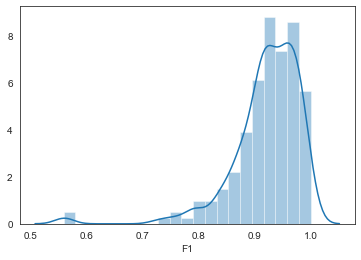

In [191]:
sns.distplot(results_rf[results_rf['granularity']==200]['F1'])
sns.distplot(results_rf[results_rf['granularity']==20]['F1'])

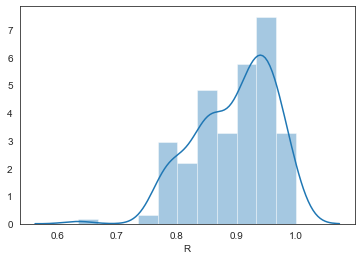

In [192]:
sns.distplot(results_rf[results_rf['granularity']==200]['R'])
sns.distplot(results_rf[results_rf['granularity']==20]['R'])

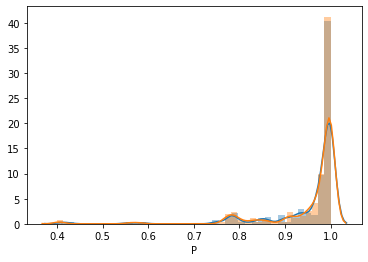

In [101]:
sns.distplot(results_rf[results_rf['granularity']==200]['P'])
sns.distplot(results_rf[results_rf['granularity']==20]['P'])

In [92]:
results_rf = results_rf.sort_values(by='F1')

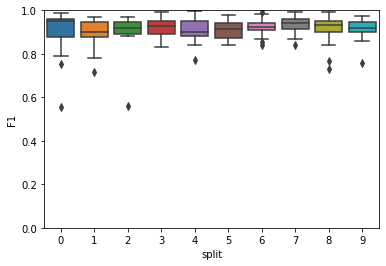

In [93]:
g = sns.boxplot(data=results_rf[results_rf['granularity']==20], y='F1', x= 'split').set(ylim=(0, 1))

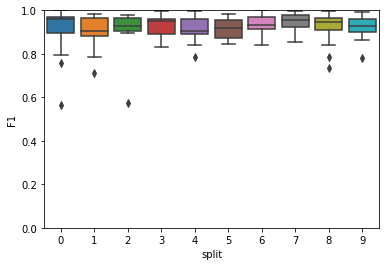

In [94]:
g = sns.boxplot(data=results_rf[results_rf['granularity']==200], y='F1', x= 'split').set(ylim=(0, 1))

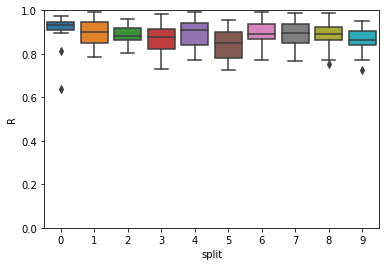

In [95]:
g = sns.boxplot(data=results_rf[results_rf['granularity']==20], y='R', x= 'split').set(ylim=(0, 1))

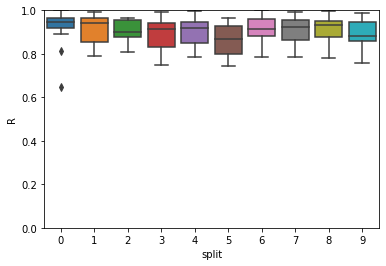

In [96]:
g = sns.boxplot(data=results_rf[results_rf['granularity']==200], y='R', x= 'split').set(ylim=(0, 1))

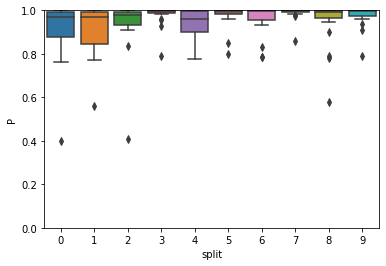

In [97]:
g = sns.boxplot(data=results_rf[results_rf['granularity']==20], y='P', x= 'split').set(ylim=(0, 1))

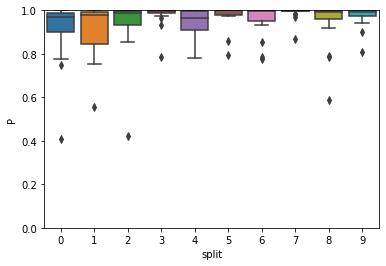

In [98]:
g = sns.boxplot(data=results_rf[results_rf['granularity']==200], y='P', x= 'split').set(ylim=(0, 1))

In [35]:
pieces_chosen = ['CelestialShore_DieForUs', 
                 'BigTroubles_Phantom', 
                 'PurlingHiss_Lolita',
                 'AlexanderRoss_GoodbyeBolero',
                 'Auctioneer_OurFutureFaces']

df_melt = pd.melt(results_rf[results_rf['piece'].isin(pieces_chosen)], 
                  id_vars=['threshold','piece'], 
                  value_vars=['ACC','P','R','F1'],
                  var_name='metric', value_name='value')

In [36]:
df_melt

,threshold,piece,metric,value
0,0.005457,CelestialShore_DieForUs,ACC,0.550215
1,0.008007,CelestialShore_DieForUs,ACC,0.591822
2,0.007473,PurlingHiss_Lolita,ACC,0.824493
3,0.007855,PurlingHiss_Lolita,ACC,0.826053
4,0.009379,PurlingHiss_Lolita,ACC,0.829953
5,0.006413,PurlingHiss_Lolita,ACC,0.825273
6,0.005457,PurlingHiss_Lolita,ACC,0.827613
7,0.007473,BigTroubles_Phantom,ACC,0.850340
8,0.010090,BigTroubles_Phantom,ACC,0.851701
9,0.009379,BigTroubles_Phantom,ACC,0.851701


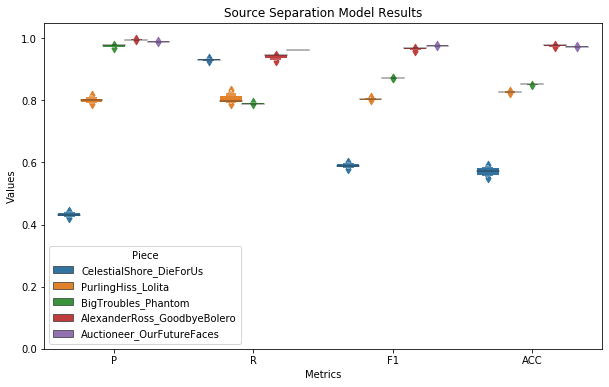

In [37]:
plt.figure(figsize=(10,6))
plt.title('Source Separation Model Results')
g = sns.boxenplot(data=df_melt,x='metric',y='value',order=['P','R','F1','ACC'],hue='piece')
g.set(ylim=(0.0,1.05))
g.set(xlabel='Metrics', ylabel='Values')
plt.legend(title='Piece')
plt.show()

In [38]:
results_rf_mean = results_rf.groupby(['piece']).mean().reset_index()

In [39]:
results_rf_mean = results_rf_mean.sort_values(by='ACC')

[(0.0, 1.0)]

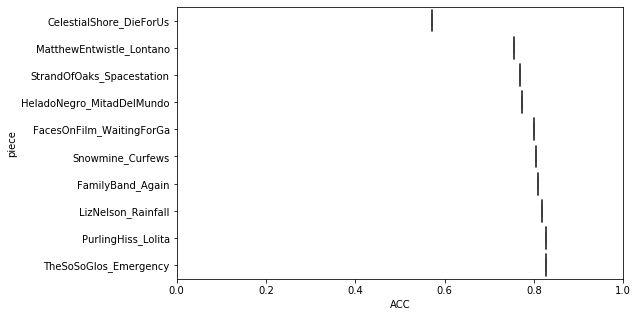

In [40]:
plt.figure(figsize=(8,5))
g= sns.boxplot(y='piece', x='ACC',  data=results_rf_mean.head(10))
g.set(xlim=(0.0,1.0))

[(0.0, 1.0)]

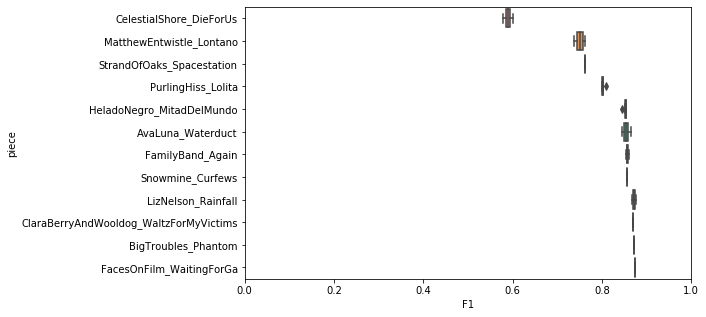

In [41]:
plt.figure(figsize=(8,5))
g= sns.boxplot(y='piece', x='F1',  data=results_rf.head(28))
g.set(xlim=(0.0,1.0))

In [123]:
sns.set_style('whitegrid')

In [124]:
df_melt = pd.melt(results_rf, id_vars=['threshold'], value_vars=['ACC','P','R','F1'],var_name='metric', value_name='value')

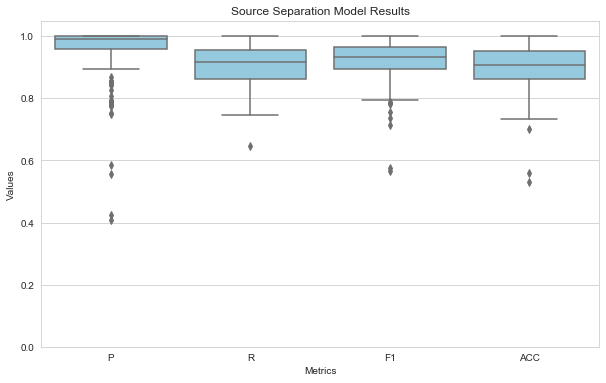

In [193]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Source Separation Model Results')
g = sns.boxplot(data=df_melt,x='metric',y='value',order=['P','R','F1','ACC'], color="skyblue")
g.set(ylim=(0.0,1.05))
g.set(xlabel='Metrics', ylabel='Values')
#plt.legend(title='Type')
plt.show()

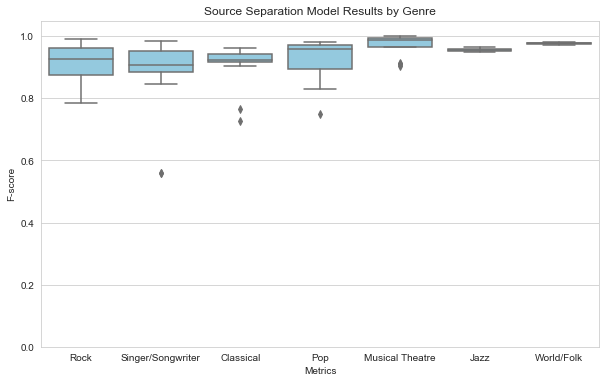

In [194]:
plt.figure(figsize=(10,6))
plt.title('Source Separation Model Results by Genre')
g = sns.boxplot(data=results_rf,x='genre',y='F1',#order=['P','R','F1','ACC'], 
                color="skyblue")
g.set(ylim=(0.0,1.05))
g.set(xlabel='Metrics', ylabel='F-score')
#plt.legend(title='Type')
plt.show()

In [195]:
def output_model(piece, tsh_optimal):
    X_test = dict_rms[piece][0].copy() / max(dict_rms[piece][0])
    y_test = dict_lbl[piece].copy()
    piece_genre = all_mtracks[piece].genre

    y_true = y_test

    normalized = X_test.copy()
    normalized[normalized > tsh_optimal] = 1
    normalized[normalized <= tsh_optimal] = 0

    return X_test, normalized

In [196]:
results_rf[results_rf['split']==2].threshold.to_list()[0]

0.02487090788781643

In [197]:
# Usar o melhor resultado de F1 para mostrar o gráfico de classificação dos trechos cantados
piece_name = pieces_chosen[0]
piece_features, piece_labels = sf.read_agg_features([piece_name], verbose=False)
proba, pred_labels = output_model(piece_name, results_rf[results_rf['split']==2].threshold.to_list()[0])

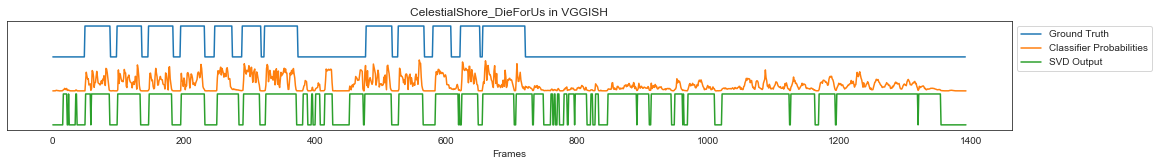

In [200]:
sns.set_style(style='white')
plt.figure(figsize=(18,2))
plt.title(piece_name+ ' in VGGISH')
plt.plot(piece_labels+2.2)
plt.plot(proba+1.1)
plt.plot(pred_labels)
plt.yticks([])
plt.xlabel('Frames')
plt.legend(['Ground Truth','Classifier Probabilities','SVD Output',], bbox_to_anchor=(1, 1))

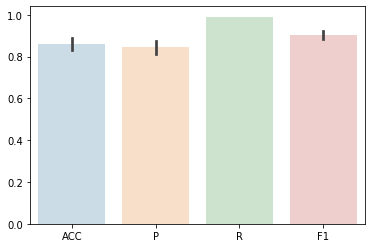

In [20]:
# Show each observation with a scatterplot
sns.barplot(data=results_rf[['ACC','P','R','F1','split']].groupby('split').mean(), dodge=True, alpha=.25, zorder=1)

NameError: name 'rms' is not defined

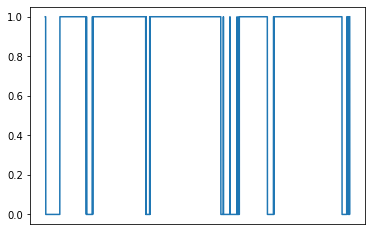

In [20]:
plt.plot(dict_rms[piece][0][:-1])
#plt.semilogy(dict_rms[piece][0][:-1], label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.show()
plt.plot(dict_rms[piece][0][:-1])
plt.semilogy(dict_lbl[piece]*dict_rms[piece][0][:-1], label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.show()
plt.plot(medfilt(dict_rms[piece][0][:-1],51))
plt.semilogy(dict_lbl[piece], label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.show()

In [109]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, f1_score

fpr, tpr, thresholds = roc_curve(y_train, X_train.T)
precision, recall, thresholds = precision_recall_curve(y_train, X_train.T)
roc_auc = auc(fpr, tpr)

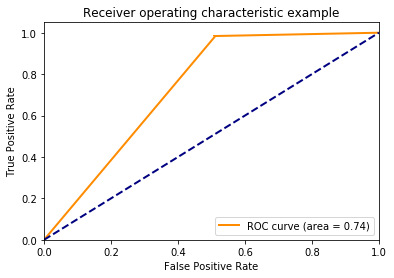

In [14]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Logistic: f1=0.884 auc=0.980


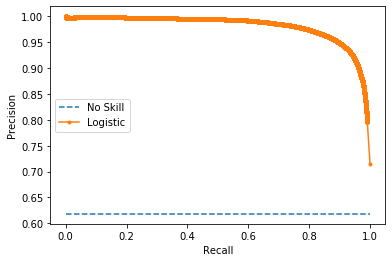

In [104]:
normalized = X_train.T
normalized[normalized > 10e-3] = 1
normalized[normalized <= 10e-3] = 0
lr_f1, lr_auc = f1_score(y_train, normalized), auc(recall, precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = sum(y_test) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [105]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
y_true = y_test

normalized = X_test
normalized[normalized > tsh_optimal] = 1
normalized[normalized <= tsh_optimal] = 0

y_pred = normalized
precision_recall_fscore_support(y_true, y_pred, average='macro')

precision_recall_fscore_support(y_true, y_pred, average='micro')

precision_recall_fscore_support(y_true, y_pred, average='weighted')


(0.14579913376338843, 0.3818365275394543, 0.21102226038705665, None)

In [106]:
from sklearn.metrics import classification_report
target_names = ['absent', 'present']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      absent       0.38      1.00      0.55     63197
     present       0.00      0.00      0.00    102311

    accuracy                           0.38    165508
   macro avg       0.19      0.50      0.28    165508
weighted avg       0.15      0.38      0.21    165508

